In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk


# Import the Data

In [2]:
df = pd.read_csv("sensor.csv")
df.drop(columns="Unnamed: 0", inplace=True)
df.dropna(axis=1, how='all', inplace=True)
df["timestamp"] = pd.to_datetime(df["timestamp"])
Elapsed_Time = df["timestamp"] - df["timestamp"][0]
df.insert(1, "Elapsed Time", Elapsed_Time)

In [3]:
df.head()

,timestamp,Elapsed Time,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,0 days 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,0 days 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,0 days 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,0 days 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,0 days 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


## Investigate the Data 

Text(0.5, 1.0, 'Classification Clases for Target Variable (Machine Status)')

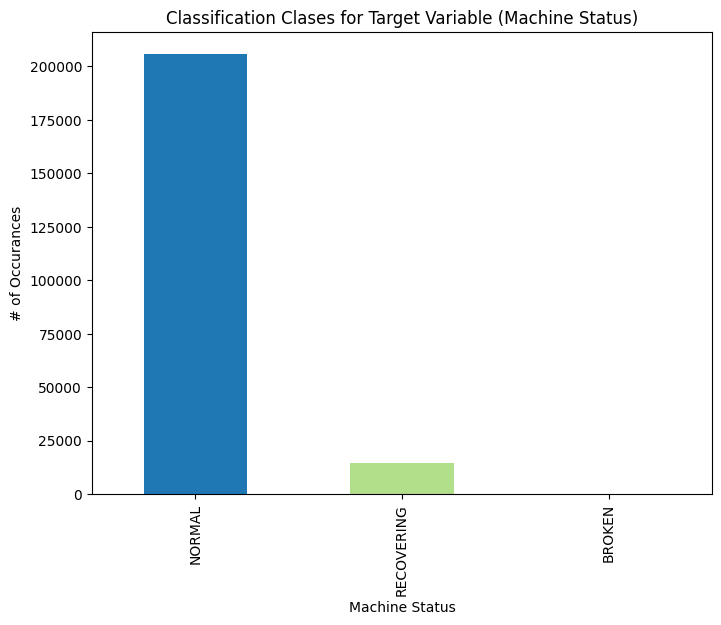

In [17]:
# Lets look at class inbalance first, namely with the variable in question, machine_status
plt.figure(figsize=(8, 6))
df["machine_status"].value_counts().plot(kind='bar', color=plt.cm.Paired([1,2,3]))
plt.xlabel("Machine Status")
plt.ylabel("# of Occurances")
plt.title("Classification Clases for Target Variable (Machine Status)")

### There's a clear class inbalance. Important to note when data is broken up in the future

In [20]:
len(df)

220320

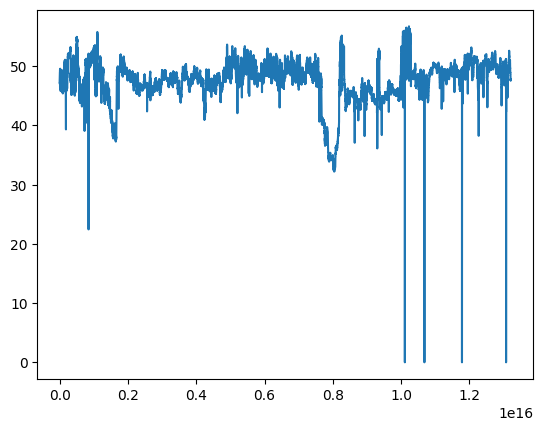

In [26]:
plt.plot(df["Elapsed Time"], df["sensor_01"])

In [30]:
df[df["machine_status"] == "BROKEN"]

,timestamp,Elapsed Time,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
17155,2018-04-12 21:55:00,11 days 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,...,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.6528,BROKEN
24510,2018-04-18 00:30:00,17 days 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,...,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.7384,BROKEN
69318,2018-05-19 03:18:00,48 days 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,...,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.5231,BROKEN
77790,2018-05-25 00:30:00,54 days 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,...,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.3611,BROKEN
128040,2018-06-28 22:00:00,88 days 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,...,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,NaN,BROKEN
141131,2018-07-08 00:11:00,98 days 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,...,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.7685,BROKEN
166440,2018-07-25 14:00:00,115 days 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,...,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,NaN,205.7292,BROKEN


KeyboardInterrupt: 

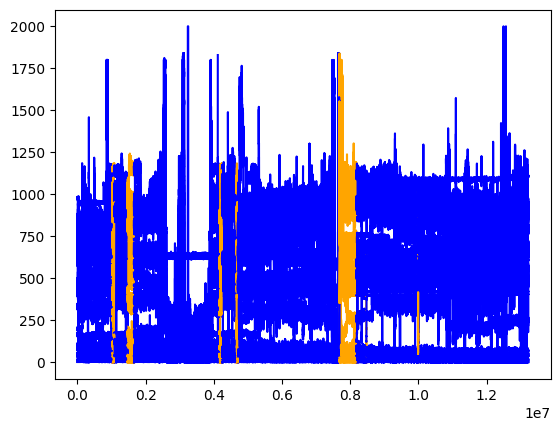

In [34]:
# Let's investigate when the failure occurs. Maybe we can plot the sensors a different colour 
# when it's down, its recovering, and when its function as it should
df["Elapsed Time"] = df["Elapsed Time"].dt.total_seconds()

color_map = {
    "NORMAL"    : "blue",
    "RECOVERING": "orange",
    "BROKEN"    : "red"
}
for col in df.columns:
    if col not in ["Elapsed Time", "machine_status", "timestamp"]:
        last_status = None
        x_vals, y_vals = [], []
    else:
         continue
    for i in range(len(df)):
            current_status = df["machine_status"].iloc[i]
            
            # Append current data points
            x_vals.append(df["Elapsed Time"].iloc[i])
            y_vals.append(df[col].iloc[i])
            
            # If the status changes or this is the last point, plot the segment
            if current_status != last_status or i == len(df) - 1:
                if x_vals and y_vals:
                    plt.plot(x_vals, y_vals, color=color_map.get(last_status, "gray"), label=last_status if last_status else "Unknown")
                
                # Reset for new segment
                x_vals, y_vals = [df["Elapsed Time"].iloc[i]], [df[col].iloc[i]]
            
            last_status = current_status
        
    # Add legend for the first sensor only
    plt.legend(loc="best") if col == df.columns[0] else None

# Configure plot labels and title
plt.xlabel("Elapsed Time")
plt.ylabel("Sensor Values")
plt.title("Sensor Data with Machine Status Segments")
plt.show()